In [1]:
#import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#import vlsvtools
#import vdfplot

Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using matplotlib version 3.4.3


In [2]:
CSVFILE = 'samples/2D_magnetosphere/2D_magnetosphere.csv'
df = pd.read_csv(CSVFILE)
df

,fileid,cellid,s0_min,s0_max,s0_mean,s0_median,s0_var,s0_skew,s0_kurt,s0_zeros,...,s24_kurt,s24_zeros,mean,zeros,partials,gap,spatial_x,spatial_y,spatial_z,pngfile
0,4000,1,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,...,-3.0,1.0,0.000024,0.76,0.08,0,-599850000.0,0.0,-359850000.0,f0004000c00001.png
1,4000,51,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,...,-3.0,1.0,0.000024,0.76,0.08,0,-584850000.0,0.0,-359850000.0,f0004000c00051.png
2,4000,101,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,...,-3.0,1.0,0.000024,0.76,0.08,0,-569850000.0,0.0,-359850000.0,f0004000c00101.png
3,4000,151,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,...,-3.0,1.0,0.000024,0.76,0.08,0,-554850000.0,0.0,-359850000.0,f0004000c00151.png
4,4000,201,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,...,-3.0,1.0,0.000024,0.76,0.08,0,-539850000.0,0.0,-359850000.0,f0004000c00201.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,4000,7052751,0.000339,0.000552,0.000443,0.000451,2.505199e-09,0.045649,-0.851638,0.0,...,-3.0,1.0,0.000024,0.72,0.12,0,225150000.0,0.0,345150000.0,f0004000c7052751.png
2867,4000,7052801,0.000339,0.000554,0.000443,0.000449,2.563533e-09,0.074711,-0.858616,0.0,...,-3.0,1.0,0.000024,0.72,0.12,0,240150000.0,0.0,345150000.0,f0004000c7052801.png
2868,4000,7052851,0.000340,0.000557,0.000443,0.000450,2.640488e-09,0.102424,-0.867795,0.0,...,-3.0,1.0,0.000024,0.76,0.08,0,255150000.0,0.0,345150000.0,f0004000c7052851.png
2869,4000,7052901,0.000344,0.000559,0.000443,0.000451,2.631603e-09,0.044335,-1.018587,0.0,...,-3.0,1.0,0.000024,0.72,0.12,0,270150000.0,0.0,345150000.0,f0004000c7052901.png


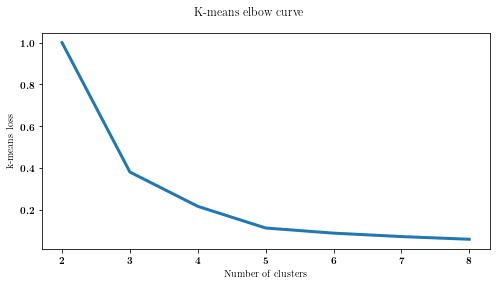

In [4]:
def plot_kmeans_elbow_curve(X, ax, max_centroids=8):
    loss = np.zeros(max_centroids-1)
    for i in range(2, max_centroids+1):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
        loss[i-2] = kmeans.inertia_
    loss = loss / loss.max()
    ax.plot(range(2, max_centroids+1), loss, lw=3)

fig, ax = plt.subplots(figsize=(7, 4))
plt.suptitle('K-means elbow curve')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('k-means loss')
plot_kmeans_elbow_curve(df[cols].values, ax=ax)
plt.tight_layout()
plt.savefig('plots/kmeans_elbow.png', dpi=300)

,fileid,cellid,class,spatial_x,spatial_y,spatial_z,pngfile
0,4000,1,3,-599850000.0,0.0,-359850000.0,f0004000c00001.png
1,4000,51,3,-584850000.0,0.0,-359850000.0,f0004000c00051.png
2,4000,101,3,-569850000.0,0.0,-359850000.0,f0004000c00101.png
3,4000,151,3,-554850000.0,0.0,-359850000.0,f0004000c00151.png
4,4000,201,3,-539850000.0,0.0,-359850000.0,f0004000c00201.png
...,...,...,...,...,...,...,...
2866,4000,7052751,3,225150000.0,0.0,345150000.0,f0004000c7052751.png
2867,4000,7052801,3,240150000.0,0.0,345150000.0,f0004000c7052801.png
2868,4000,7052851,3,255150000.0,0.0,345150000.0,f0004000c7052851.png
2869,4000,7052901,3,270150000.0,0.0,345150000.0,f0004000c7052901.png


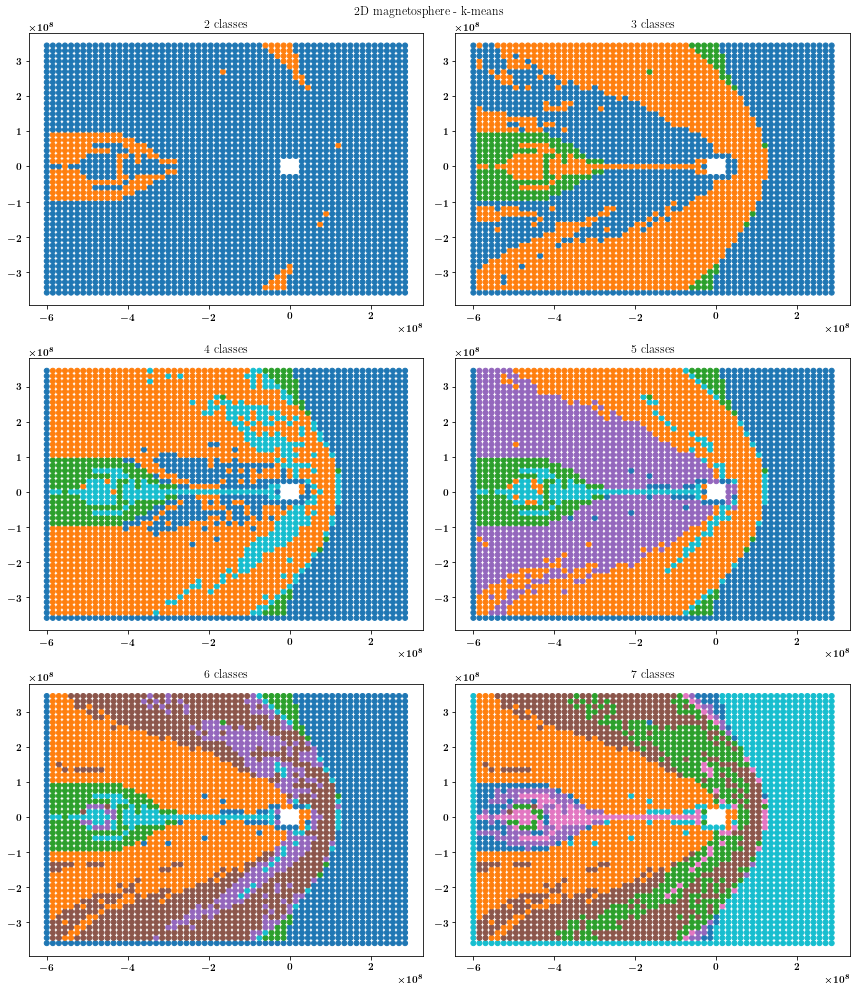

In [24]:
cmap = mpl.colors.ListedColormap(['C0', 'C1', 'C2', 'C9', 'C4', 'C5', 'C6', 'C7'])
norm = mpl.colors.BoundaryNorm(np.arange(8+1)-0.5, cmap.N)


fig, ax = plt.subplots(3, 2, figsize=(12, 14))
ax = ax.flatten()

for i, n_classes in enumerate(range(2, 8)):
    cols = ['gap', 'mean', 'zeros', 'partials']
    kmeans = KMeans(n_clusters=n_classes).fit(df[cols].values)

    kmeans_df = pd.DataFrame(df[['fileid', 'cellid',
                                'spatial_x', 'spatial_y', 'spatial_z',
                                'pngfile']])
    kmeans_df.insert(2, 'class', kmeans.labels_)

    _ = ax[i].scatter(kmeans_df['spatial_x'], kmeans_df['spatial_z'], c=kmeans_df['class'], s=25, cmap=cmap, norm=norm)
    ax[i].set_title(f'{n_classes} classes')
plt.suptitle('2D magnetosphere - k-means')
plt.tight_layout()
plt.savefig('plots/2D_magnetosphere_kmeans.png',
            facecolor='white',
            transparent=False,
            dpi=300)

<Figure size 432x288 with 0 Axes>